### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from utils.data import load_file
from utils.metrics import evaluate
import warnings 
warnings.filterwarnings('ignore')
target_names = ['first_value_y','second_value_y']

### Load Data

In [58]:
df = pd.read_csv("../data/review_2022_clean.csv")
df.head()

,text,label
0,bought fender telecaster salesperson told orig...,negative
1,visit son restaurant desert home food authenti...,positive
2,danielle great job listened cut hair way reque...,positive
3,saw lot roaches bathroom woke bed large dark s...,negative
4,ordered pork fried rice beef chow mei fun teri...,negative


In [59]:
df_sw = pd.read_csv("../data/review_2022_clean_sw.csv")
df_sw.head()

,text,label
0,i bought a fender telecaster that the salesper...,negative
1,this is our go to for take out when i visit my...,positive
2,danielle did a great job she listened and cut ...,positive
3,we saw a lot of roaches in the bathroom when w...,negative
4,we ordered pork fried rice and beef chow mei f...,negative


### Train-Test Split

Create a function to perform train-test split.

In [60]:
def split(stop_words=False):
  if stop_words:
    X = df_sw["text"]
    y = df_sw["label"]
  else:
    X = df["text"]
    y = df["label"]
  return train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train, X_test, y_train, y_test = split()

In [62]:
X_train_sw, X_test_sw, y_train_sw, y_test_sw = split(stop_words=True)

In [63]:
y_train = load_file("y_train.pickle")

X_train_uni = load_file("X_train_uni.pickle")
X_test_uni = load_file("X_test_uni.pickle")

X_train_uni_sw = load_file("X_train_uni_sw.pickle")
X_test_uni_sw = load_file("X_test_uni_sw.pickle")

X_train_bi = load_file("X_train_bi.pickle")
X_test_bi = load_file("X_test_bi.pickle")

X_train_bi_sw = load_file("X_train_bi_sw.pickle")
X_test_bi_sw = load_file("X_test_bi_sw.pickle")

X_train_uni_bi = load_file("X_train_uni_bi.pickle")
X_test_uni_bi = load_file("X_test_uni_bi.pickle")

X_train_uni_bi_sw = load_file("X_train_uni_bi_sw.pickle")
X_test_uni_bi_sw = load_file("X_test_uni_bi_sw.pickle")

### Modeling

Define parameter settings to try

In [64]:
param_grid = {
    'C'       : np.logspace(-2, 2, 5),
    #'penalty' : ['l1','l2'],
    #'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

Create a function to create a new instance of grid search with 10-fold cross-validation.

In [65]:
def create_grid_search():
  model = LogisticRegression(class_weight="balanced", random_state=42, max_iter=10000)
  grid_search = GridSearchCV(model,                                          # model
                             param_grid=param_grid,                          # hyperparameters
                             cv=10,                                          # number of folds
                             scoring="balanced_accuracy")                    # metric for scoring
  return grid_search

In [66]:
def train_evaluate(X_train, X_test):
  grid_search = create_grid_search()
  grid_search.fit(X_train, y_train)
  
  print("Best Parameters:")
  print(grid_search.best_params_)

  y_pred = grid_search.predict(X_test)
  evaluate(y_pred)

#### Unigrams

Best Parameters:
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.84      0.83      1770
     neutral       0.27      0.60      0.38       428
    positive       0.96      0.84      0.90      4135

    accuracy                           0.82      6333
   macro avg       0.69      0.76      0.70      6333
weighted avg       0.88      0.82      0.85      6333

Confusion Matrix:


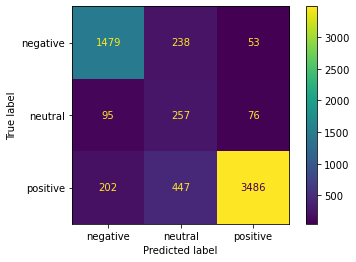

In [41]:
train_evaluate(X_train_uni, X_test_uni)

#### Unigrams + Stop Words

Best Parameters:
{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      1770
     neutral       0.32      0.58      0.42       428
    positive       0.97      0.89      0.93      4135

    accuracy                           0.86      6333
   macro avg       0.72      0.78      0.74      6333
weighted avg       0.90      0.86      0.88      6333

Confusion Matrix:


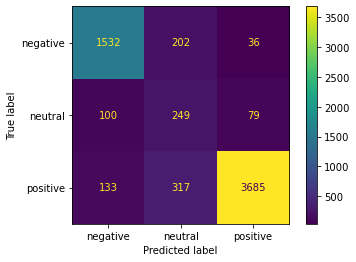

In [42]:
train_evaluate(X_train_uni_sw, X_test_uni_sw)

#### Bigrams

Best Parameters:
{'C': 0.01}
Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.85      0.76      1770
     neutral       0.27      0.29      0.28       428
    positive       0.91      0.81      0.86      4135

    accuracy                           0.79      6333
   macro avg       0.62      0.65      0.63      6333
weighted avg       0.81      0.79      0.79      6333

Confusion Matrix:


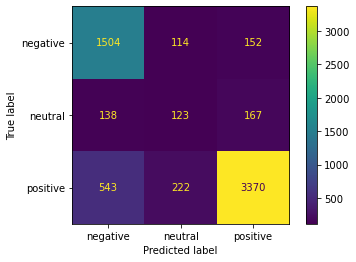

In [47]:
train_evaluate(X_train_bi, X_test_bi)

#### Bigrams + Stop Words

Best Parameters:
{'C': 0.1}
Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.81      0.81      1770
     neutral       0.29      0.54      0.38       428
    positive       0.95      0.85      0.90      4135

    accuracy                           0.82      6333
   macro avg       0.68      0.74      0.69      6333
weighted avg       0.86      0.82      0.84      6333

Confusion Matrix:


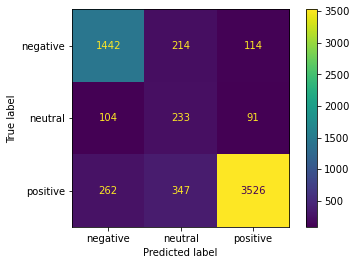

In [48]:
train_evaluate(X_train_bi_sw, X_test_bi_sw)

#### Unigrams + Bigrams

Best Parameters:
{'C': 0.1}
Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.82      0.82      1770
     neutral       0.26      0.60      0.37       428
    positive       0.96      0.83      0.89      4135

    accuracy                           0.81      6333
   macro avg       0.68      0.75      0.69      6333
weighted avg       0.87      0.81      0.83      6333

Confusion Matrix:


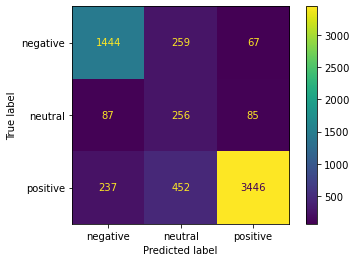

In [49]:
train_evaluate(X_train_uni_bi, X_test_uni_bi)

#### Unigrams + Bigrams + Stop Words

Best Parameters:
{'C': 1.0}
Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.89      0.88      1770
     neutral       0.38      0.51      0.44       428
    positive       0.97      0.92      0.94      4135

    accuracy                           0.88      6333
   macro avg       0.74      0.77      0.75      6333
weighted avg       0.90      0.88      0.89      6333

Confusion Matrix:


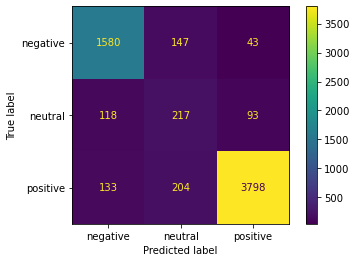

In [50]:
train_evaluate(X_train_uni_bi_sw, X_test_uni_bi_sw)